# Final Project
#### This contains all the code combined from all files and csv files generated

In [164]:
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
import csv
import pandas as pd, numpy as np, scipy as s
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (0.11.2)

Requirement already satisfied: numpy>=1.15 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.22.2)

Requirement already satisfied: scipy>=1.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.8.0)

Requirement already satisfied: pandas>=0.23 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (1.4.1)

Requirement already satisfied: matplotlib>=2.2 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from seaborn) (3.5.1)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: pyparsing>=2.2.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (3.0.7)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (4.29.1)

Requirement already satisfied: cycler>=0.10 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (1.3.2)

Requirement already satisfied: packaging>=20.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (21.3)

Requirement already satisfied: pillow>=6.2.0 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from matplotlib>=2.2->seaborn) (9.0.1)

Requirement already satisfied: pytz>=2020.1 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.23->seaborn) (2021.3)

Requirement already satisfied: six>=1.5 in c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

WARNING: You are using pip version 22.0.3; however, version 22.0.4 is available.
You should consider upgrading via the 'c:\users\derrick\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Combining and Cleaning Datasets

In [165]:
df_cust=pd.read_csv("customers.csv")
df_articles=pd.read_csv("articles.csv")
df_trx=pd.read_csv("transactions_train.csv")

In [166]:
for i in['FN','Active','club_member_status','fashion_news_frequency']:
    print("null values: ",df_cust[i].isna().sum())
    print(df_cust[i].value_counts())
    print("----------------------------")

null values:  895050
1.0    476930
Name: FN, dtype: int64
----------------------------
null values:  907576
1.0    464404
Name: Active, dtype: int64
----------------------------
null values:  6062
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
----------------------------
null values:  16009
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
----------------------------


In [167]:
df_cust['FN'].fillna(value=0,inplace=True)
df_cust['Active'].fillna(value=0,inplace=True)
df_cust['club_member_status'].fillna(value="ACTIVE",inplace=True)
df_cust['fashion_news_frequency'].fillna(value="NONE",inplace=True)

In [168]:
df_cust['fashion_news_frequency']=df_cust['fashion_news_frequency'].apply(lambda x: "NONE" if x=="None" else x)

In [169]:
for i in['FN','Active','club_member_status','fashion_news_frequency']:
    print("null values: ",df_cust[i].isna().sum())
    print(df_cust[i].value_counts())
    print("----------------------------")

null values:  0
0.0    895050
1.0    476930
Name: FN, dtype: int64
----------------------------
null values:  0
0.0    907576
1.0    464404
Name: Active, dtype: int64
----------------------------
null values:  0
ACTIVE        1278553
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64
----------------------------
null values:  0
NONE         893722
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64
----------------------------


In [170]:
df_articles.nunique().sort_values()

index_group_no                       5
index_group_name                     5
perceived_colour_value_id            8
perceived_colour_value_name          8
index_name                          10
index_code                          10
product_group_name                  19
perceived_colour_master_name        20
perceived_colour_master_id          20
garment_group_name                  21
garment_group_no                    21
graphical_appearance_name           30
graphical_appearance_no             30
colour_group_name                   50
colour_group_code                   50
section_name                        56
section_no                          57
product_type_name                  131
product_type_no                    132
department_name                    250
department_no                      299
detail_desc                      43404
prod_name                        45875
product_code                     47224
article_id                      105542
dtype: int64

In [171]:
graphical_appearance=pd.Series(df_articles.graphical_appearance_name.values,
                               index=df_articles.graphical_appearance_no).sort_index().to_dict()
index_group=pd.Series(df_articles.index_group_name.values,
                               index=df_articles.index_group_no).sort_index().to_dict()
perceived_colour_value=pd.Series(df_articles.perceived_colour_value_name.values,
                               index=df_articles.perceived_colour_value_id).sort_index().to_dict()
index=pd.Series(df_articles.index_name.values,
                               index=df_articles.index_code).sort_index().to_dict()
perceived_colour_master=pd.Series(df_articles.perceived_colour_master_name.values,
                               index=df_articles.perceived_colour_master_id).sort_index().to_dict()
garment_group=pd.Series(df_articles.garment_group_name.values,
                               index=df_articles.garment_group_no).sort_index().to_dict()
colour_group=pd.Series(df_articles.colour_group_name.values,
                               index=df_articles.colour_group_code).sort_index().to_dict()
section=pd.Series(df_articles.section_name.values,
                               index=df_articles.section_no).sort_index().to_dict()
department=pd.Series(df_articles.department_name.values,
                               index=df_articles.department_no).sort_index().to_dict()
product_type=pd.Series(df_articles.product_type_name.values,
                               index=df_articles.product_type_no).sort_index().to_dict()
product=pd.Series(df_articles.prod_name.values,
                               index=df_articles.product_code).sort_index().to_dict()
dict_list={'graphical_appearance':graphical_appearance,'index_group':index_group,'perceived_colour_value':perceived_colour_value,
           'index':index, 'perceived_colour_master':perceived_colour_master,'garment_group':garment_group,
          'colour_group':colour_group,'section':section,'department':department,'product_type':product_type,
          "product": product}

In [172]:
print("columns having -1 values: \n")
cols_missing_value=[]
for i in df_articles.columns:
    if (-1 in df_articles[i].value_counts()):
        cols_missing_value.append(i)
print(cols_missing_value)  

columns having -1 values: 

['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id']


In [173]:
product_type[-1]

'Unknown'

In [174]:
df_cust.to_csv("customers_clean.csv",index=False)
df_articles.to_csv("articles_clean.csv", index=False)

In [175]:
df=pd.merge(left=df_cust,right=df_trx,on="customer_id",how="left")
df=pd.merge(left=df,right=df_articles,on='article_id',how='left')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31798023 entries, 0 to 31798022
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   customer_id                   object 
 1   FN                            float64
 2   Active                        float64
 3   club_member_status            object 
 4   fashion_news_frequency        object 
 5   age                           float64
 6   postal_code                   object 
 7   t_dat                         object 
 8   article_id                    float64
 9   price                         float64
 10  sales_channel_id              float64
 11  product_code                  float64
 12  prod_name                     object 
 13  product_type_no               float64
 14  product_type_name             object 
 15  product_group_name            object 
 16  graphical_appearance_no       float64
 17  graphical_appearance_name     object 
 18  colour_group_code   

In [177]:
df.nunique()

customer_id                     1371980
FN                                    2
Active                                2
club_member_status                    3
fashion_news_frequency                3
age                                  84
postal_code                      352899
t_dat                               734
article_id                       104547
price                              9857
sales_channel_id                      2
product_code                      46834
prod_name                         45508
product_type_no                     131
product_type_name                   130
product_group_name                   19
graphical_appearance_no              30
graphical_appearance_name            30
colour_group_code                    50
colour_group_name                    50
perceived_colour_value_id             8
perceived_colour_value_name           8
perceived_colour_master_id           20
perceived_colour_master_name         20
department_no                       299


In [178]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001.0,0.044051,...,Young Boy Outdoor,I,Children Sizes 134-170,4.0,Baby/Children,45.0,Kids Outerwear,1007.0,Outdoor,"Padded jacket with a detachable hood, stand-up..."
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023.0,0.035576,...,Jacket Street,F,Menswear,3.0,Menswear,31.0,Mens Outerwear,1007.0,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010.0,0.030492,...,Kids Girl Outdoor,H,Children Sizes 92-140,4.0,Baby/Children,45.0,Kids Outerwear,1007.0,Outdoor,"Padded parka in woven fabric with a soft, brus..."
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006.0,0.010153,...,Kids Girl Jersey Fancy,H,Children Sizes 92-140,4.0,Baby/Children,76.0,Kids Girl,1005.0,Jersey Fancy,Playsuit in cotton jersey with butterfly sleev...
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006.0,0.050831,...,Suit,A,Ladieswear,1.0,Ladieswear,11.0,Womens Tailoring,1008.0,Dressed,Fitted jacket in woven fabric with notch lapel...


already created the csv file

In [179]:
#df.to_csv("combined_data.csv",index=False)

## Code to generate smaller data set, its already created

In [180]:
#df = pd.read_csv("combined_data.csv")

In [181]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001.0,0.044051,...,Young Boy Outdoor,I,Children Sizes 134-170,4.0,Baby/Children,45.0,Kids Outerwear,1007.0,Outdoor,"Padded jacket with a detachable hood, stand-up..."
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023.0,0.035576,...,Jacket Street,F,Menswear,3.0,Menswear,31.0,Mens Outerwear,1007.0,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010.0,0.030492,...,Kids Girl Outdoor,H,Children Sizes 92-140,4.0,Baby/Children,45.0,Kids Outerwear,1007.0,Outdoor,"Padded parka in woven fabric with a soft, brus..."
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006.0,0.010153,...,Kids Girl Jersey Fancy,H,Children Sizes 92-140,4.0,Baby/Children,76.0,Kids Girl,1005.0,Jersey Fancy,Playsuit in cotton jersey with butterfly sleev...
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006.0,0.050831,...,Suit,A,Ladieswear,1.0,Ladieswear,11.0,Womens Tailoring,1008.0,Dressed,Fitted jacket in woven fabric with notch lapel...


In [182]:
#small_set = df.loc[df['customer_id'].isin(['00c160fd797be9c52491373b16ec194d4edb129c57266e85e65bb9814a25490d', '0284d10c3374ded9756bd9efeff7f6c8a2f31391364102701297e67d0886035d', '073da0c6e0c8538bc435967da0251054e48217687589a32dc9260734eeecf5da','0863b92e036a35df88e1dc6eb34b161a79d63c14c15601bdf80bab2ecb4bc454'])]

In [183]:
#small_set.to_csv("smallset.csv",index=False)

## Testing smaller dataset of 700 entries

In [184]:
df = pd.read_csv("smallset.csv")

In [185]:
df.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
724,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,831777004.0,0.011847,...,Blouse,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1010.0,Blouses,Top in a softly draping weave with a V-neck fr...
725,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,834383002.0,0.042356,...,Dress,A,Ladieswear,1.0,Ladieswear,15.0,Womens Everyday Collection,1013.0,Dresses Ladies,"Short, sleeveless dress in sturdy satin with a..."
726,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...
727,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,714026020.0,0.025407,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in woven fabric with a concealed...
728,0863b92e036a35df88e1dc6eb34b161a79d63c14c15601...,0.0,0.0,ACTIVE,NONE,27.0,bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...,2020-08-06,892337003.0,0.101678,...,Trouser S&T,F,Menswear,3.0,Menswear,23.0,Men Suits & Tailoring,1009.0,Trousers,Suit trousers in superstretch fabric made from...


In [186]:
df.pop("detail_desc")
df.columns
df1 = df.pop("article_id")
df["article_id"] = df1

In [187]:
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals

### Data normalization and scaling

In [188]:
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 1.637 -1.651 -1.427 ... -1.25  -1.033 -0.731]
 [ 1.637 -1.651 -1.427 ...  1.321 -0.409  1.077]
 [-0.674  0.606  0.701 ...  0.831  0.84   1.438]
 ...
 [-0.674  0.606  0.701 ...  1.199  1.049  0.896]
 [-0.674  0.606  0.701 ... -1.25  -0.825 -0.369]
 [ 1.637 -1.651 -1.427 ...  0.464 -1.033 -0.731]]
[[-0.674  0.606  0.701 ...  1.199  1.049  0.896]
 [-0.674  0.606  0.701 ... -1.372 -1.45  -0.911]
 [-0.674  0.606  0.701 ...  0.464 -1.033 -0.731]
 ...
 [-0.674  0.606  0.701 ...  0.464 -1.242 -0.55 ]
 [-0.674  0.606  0.701 ... -1.617  1.257 -1.634]
 [-0.674  0.606  0.701 ...  0.219 -1.242 -0.55 ]]
[240  81 530 141 530 303 369 283 141  26 147  15 208  96  51 327 139 523
 319 159  33 150 251 107 460 341 469 382 533  47 274 177 279 161 146  48
 519 467 190 488 482 344 368 373 256  76 208 386 198 535  85 311 262 165
 243 408 343 520 199 349  74 218 253 478 157 166 184 263 103 429  64 445
 500 153 423  54 487 501  90 379 253 492   8 193  85  83 263 522 111 129
 192 474 315 167 402 345 453 380 31

### KNN

In [189]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
print("SciKitLearn")
print("KNN")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

[490 390  17 318  87 109  37 407 508 127 357 506   0 109 165 287 190  52
 177 190 522 129  31  35 253  93 188 337 173 338  92 114 170 241   4 340
 174  54 245 441 496 218 383 129  59 146 253 102 267  47 387 146  43 187
 164  62   1 187 437 114  66 237 353 256 280 364 413 241 364   1  74 165
  35]
[490 432 137 395 409  50 396 529 456 403 481 115   0 109 361 286  86  88
 294  84 524  38  70 143 139 214 186 453 444 332 339 233 249  60 281 525
 174 126 246 400 455 526 494 129  87 161 253  58 215  12 440 116 207 138
 198 276  39 270 528 219  77 489 527 256 484 260 436 167 155   2 128 333
  35]
SciKitLearn
KNN
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.1095890410958904 0.8904109589041096


In [190]:
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
print("SciKitLearn")
print("KNN")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

[190 255 146 173 190 146 146 190 365 253 508 349 508 349 255 190 190 190
 129 190 112 129   7 349 146 190 112 129 190  14  92 190 129 129 129 255
 190  85 508 112  14 319 255 129 190 146 349 190 184 112 349 146 146  14
 129 129 190  14 349 141 190 319 349 255 390 112 190  14 112 253 146 141
 349]
[490 432 137 395 409  50 396 529 456 403 481 115   0 109 361 286  86  88
 294  84 524  38  70 143 139 214 186 453 444 332 339 233 249  60 281 525
 174 126 246 400 455 526 494 129  87 161 253  58 215  12 440 116 207 138
 198 276  39 270 528 219  77 489 527 256 484 260 436 167 155   2 128 333
  35]
SciKitLearn
KNN
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0136986301369863 0.9863013698630136


### SVM

In [191]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4246575342465753 0.5753424657534247


In [192]:
clf_svm = svm.SVC(kernel='poly', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.136986301369863 0.863013698630137


In [193]:
clf_svm = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.1643835616438356 0.8356164383561644


### Decision Tree

In [194]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SciKitLearn")
print("Trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Trees
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.3972602739726027 0.6027397260273972


### Naive Bayes

In [195]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4520547945205479 0.547945205479452


### Random Forest 10

In [196]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 10")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 10
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4383561643835616 0.5616438356164384


### Random Forest 100

In [197]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 100")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 100
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4657534246575342 0.5342465753424658


### Random Forest 1000

In [198]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 1000")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 1000
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.4657534246575342 0.5342465753424658


### Logistic Regression

In [199]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("SciKitLearn")
print("Logistic regression")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Logistic regression
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.3835616438356164 0.6164383561643836


c:\users\derrick\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0136986301369863 0.9863013698630136


In [201]:
gradient_booster = GradientBoostingClassifier(learning_rate=1)
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.410958904109589 0.589041095890411


In [202]:
svc=svm.SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with svml")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

SciKitLearn
Adaboost with svml
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0 1.0


In [203]:
svc=svm.SVC(probability=True, kernel='poly')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,
                         learning_rate=1)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("SciKitLearn")
print("Adaboost with svmp")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)


SciKitLearn
Adaboost with svmp
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.0 1.0


## Looking at Correlation

<AxesSubplot:>

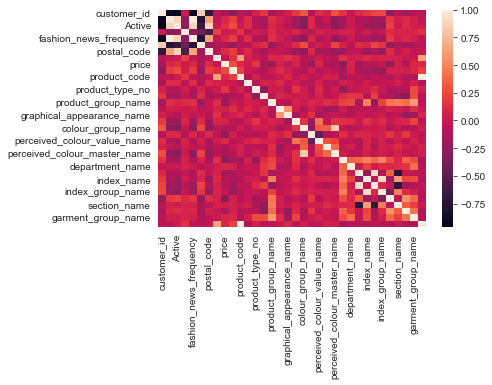

In [204]:
sns.heatmap(processdf.corr())

C:\Users\Derrick\AppData\Local\Temp\ipykernel_2228\2819867210.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

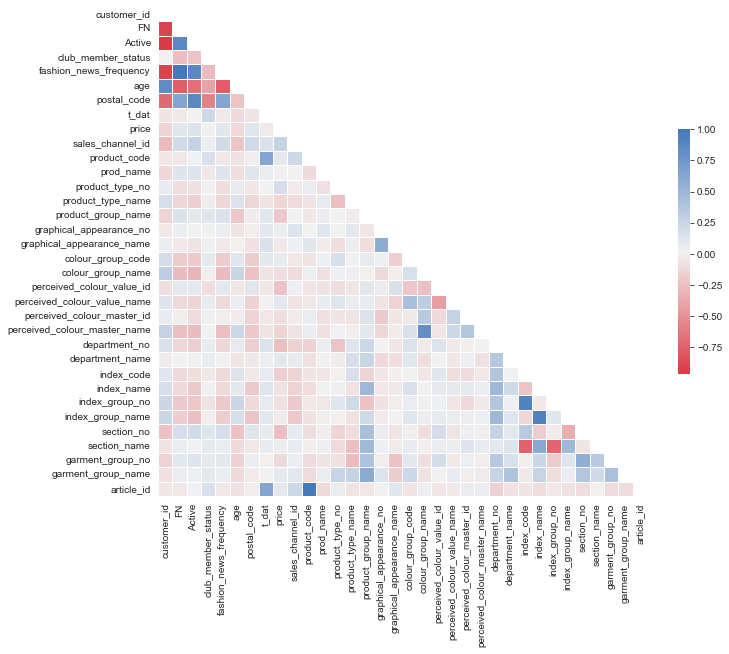

In [205]:
corr = processdf.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Text(0.5, 1.0, 'Correlation')

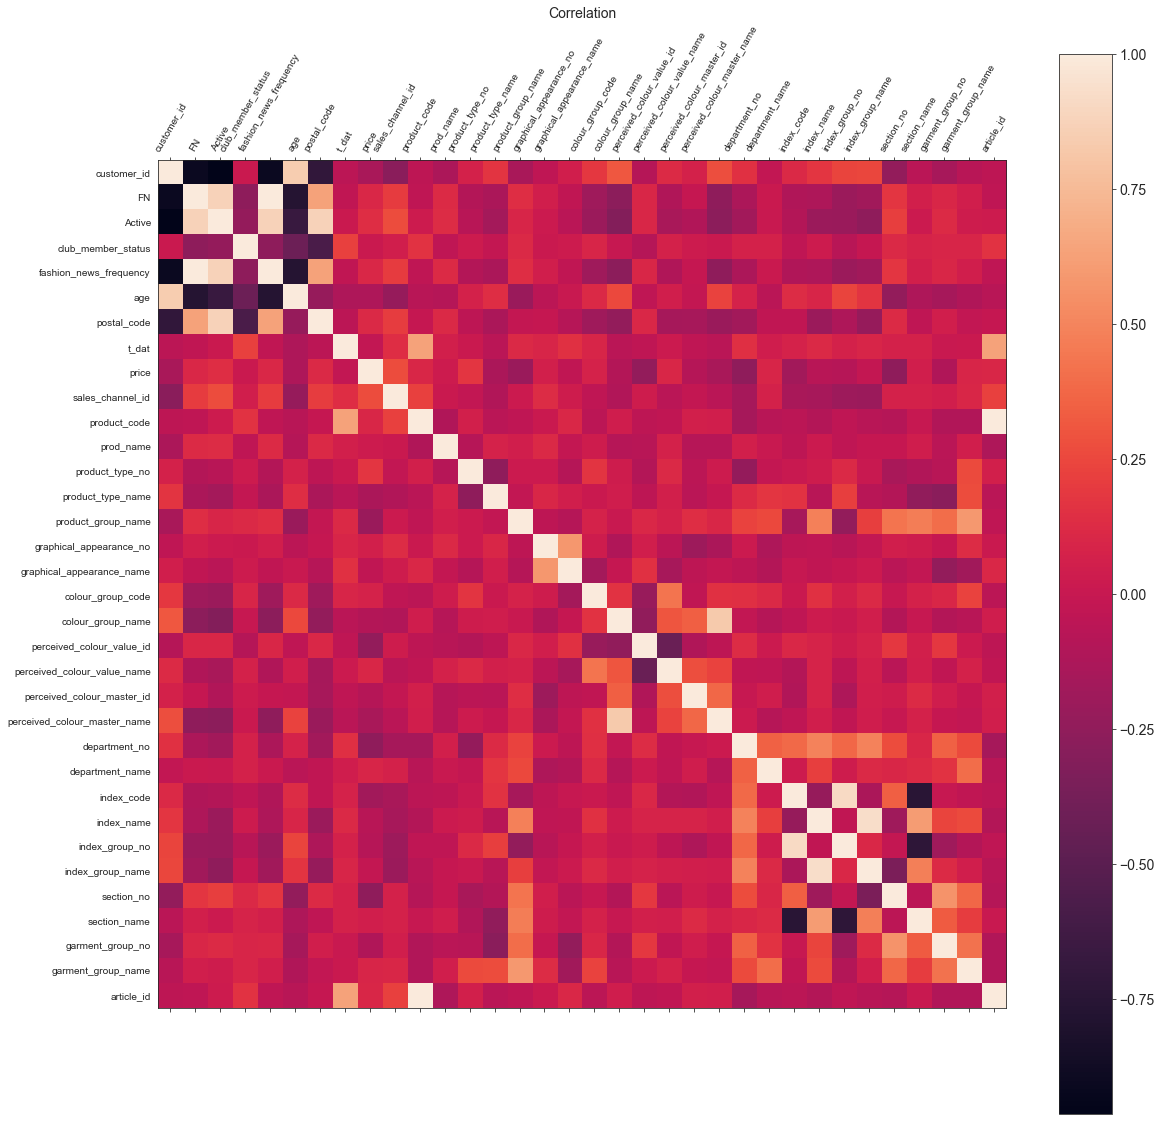

In [206]:
corr = processdf.corr()
fig = plt.figure(figsize=(19,19))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10,rotation=60)
plt.yticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation', fontsize=14)

## Feature selection

In [207]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(processdf.columns)
print(fit.scores_)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'article_id'],
      dtype='object')
[ 1381.635   188.174   231.073   680.625   188.174   127.51    139.63
 13576.51  11510.689    66.713 57262.431 55856.347  3703.803  5819.798
  1142.975  1495.159  1951.306  6213.457  9803.163   517.65    779.255
  1577.681  4320.091 12345.155  9798.192   962.7     793.

## Results of first run

In [208]:
labs = ['KNN5', "KNN100", "SVML", "SVMP", "SVMRGF", "DT","NB","RF10", "RF100", "RF1000", "LR", "Adaboost", "GB","AdaSVML","AdaSVMP"]

len(acc)

15

In [209]:
len(labs)

15

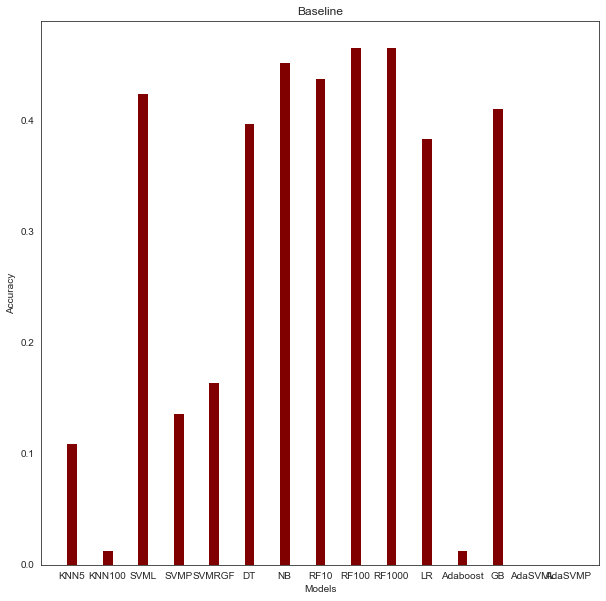

In [210]:
fig = plt.figure(figsize= (10, 10))
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Baseline")
plt.show()

# Second run with feature trim and best models

In [211]:
df = pd.read_csv("smallset.csv")
df.pop("detail_desc")
df.columns
df1 = df.pop("article_id")
df["article_id"] = df1
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.659  0.603  0.684 ...  1.217  1.071  0.937]
 [-0.659  0.603  0.684 ... -1.357 -1.421 -0.87 ]
 [-0.659  0.603  0.684 ...  0.727  0.863  1.479]
 ...
 [-0.659  0.603  0.684 ...  1.462 -1.005 -0.69 ]
 [-0.659  0.603  0.684 ... -0.99  -0.383  1.117]
 [ 1.654 -1.658 -1.462 ... -0.377  0.033 -0.148]]
[[-0.659  0.603  0.684 ...  0.727  0.863  1.479]
 [-0.659  0.603  0.684 ...  1.217  1.071  0.937]
 [-0.659  0.603  0.684 ...  0.849  1.694  0.575]
 ...
 [-0.659  0.603  0.684 ... -0.744  0.655  1.298]
 [-0.659  0.603  0.684 ...  0.482 -1.005 -0.69 ]
 [ 1.654 -1.658 -1.462 ...  1.34   0.448 -1.051]]
[444 404 392 513 201 449  33 298 265 384 481 170  45 108 442 225 477 247
 205 148 190  36  74 465  46  89  18  21 141 453 166   3 462 461 152 373
 129 487 179 396  64 125 507 444  48 193 502 308 242 469 226  87 421 245
 206 518 398 116 514  59 286 343 135 146 457 119 410 353 228 361 301 258
 170 246 485 312 418 470 126 227 324  35 132 130 109  96 102  23 190 433
 201 294 401 159 180 353   9 359 20

Text(0.5, 1.0, 'Correlation')

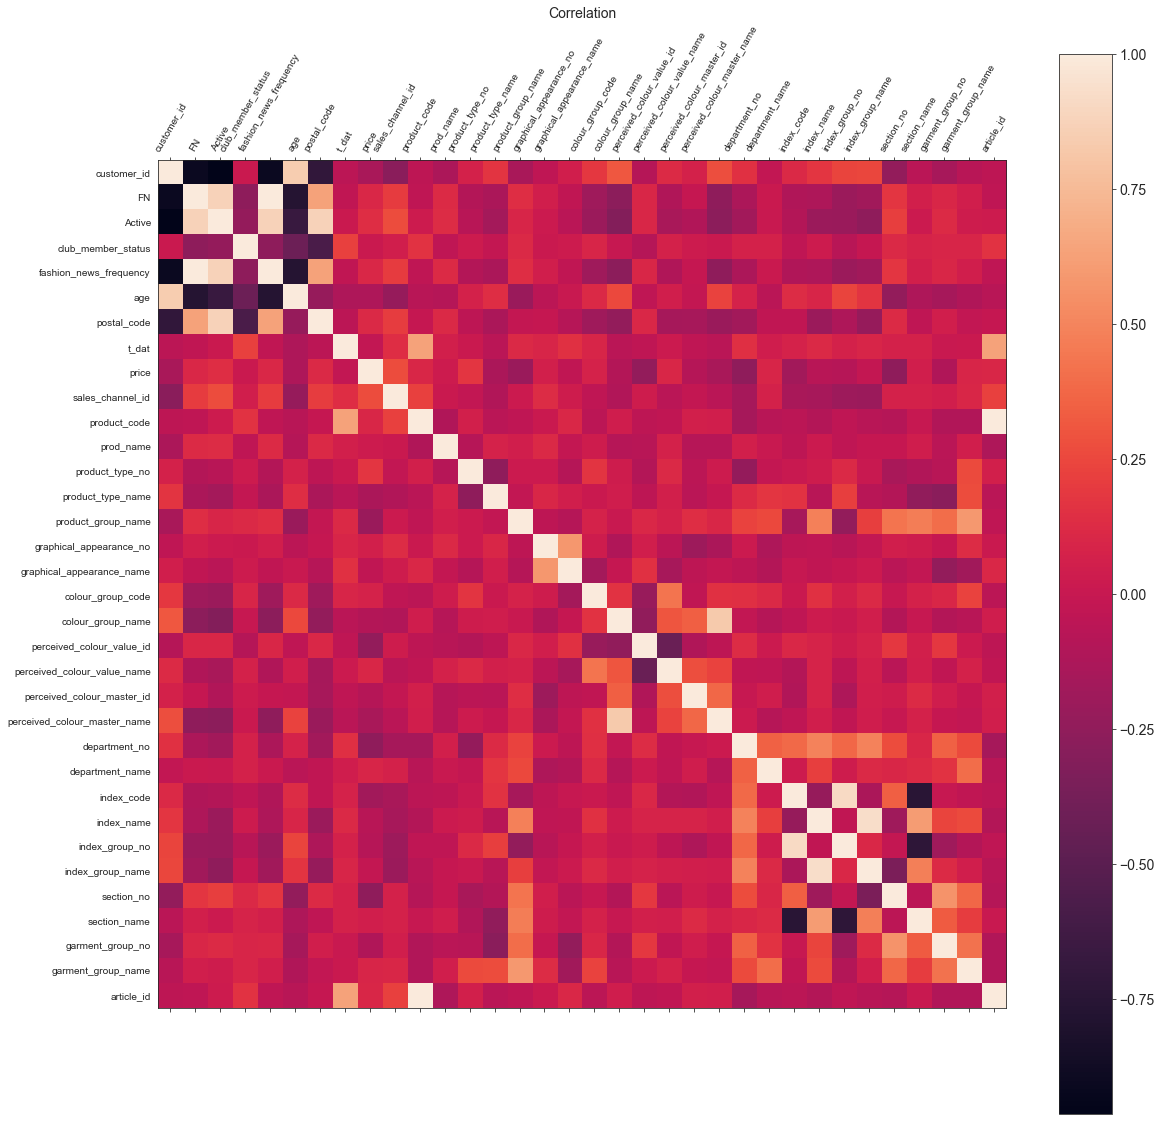

In [212]:
corr = processdf.corr()
fig = plt.figure(figsize=(19,19))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10,rotation=60)
plt.yticks(range(processdf.select_dtypes(['number']).shape[1]),processdf.select_dtypes(['number']).columns,fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation', fontsize=14)

In [213]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(processdf.columns)
print(fit.scores_)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 't_dat', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'article_id'],
      dtype='object')
[ 1381.635   188.174   231.073   680.625   188.174   127.51    139.63
 13576.51  11510.689    66.713 57262.431 55856.347  3703.803  5819.798
  1142.975  1495.159  1951.306  6213.457  9803.163   517.65    779.255
  1577.681  4320.091 12345.155  9798.192   962.7     793.

In [214]:
df.pop("FN")
df.pop("Active")
df.pop("club_member_status")
df.pop("prod_name")
df.pop("postal_code")

0      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
1      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
2      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
3      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
4      ff00631c6ec7b0902cbcfde3e49dcd986efc2e3e20745b...
                             ...                        
724    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
725    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
726    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
727    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
728    bb3bdf0dcd8677549584823cc95f67b8aafb547d941500...
Name: postal_code, Length: 729, dtype: object

In [215]:
acc = []
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,28].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.664  0.601 -0.447 ...  0.705  0.813  1.42 ]
 [-0.664  0.601 -0.447 ... -1.24   0.394 -1.094]
 [-0.664  0.601 -0.447 ... -1.24  -1.07  -0.735]
 ...
 [-0.664  0.601 -0.447 ... -1.24  -0.233 -1.453]
 [-0.664  0.601 -0.447 ... -1.24  -0.861 -0.376]
 [-0.664  0.601 -0.447 ... -1.605  1.231 -1.633]]
[[-0.664  0.601 -0.447 ... -1.24  -0.443  1.061]
 [-0.664  0.601 -0.447 ... -1.24  -0.443  1.061]
 [-0.664  0.601 -0.447 ... -1.362 -1.489 -0.915]
 ...
 [-0.664  0.601 -0.447 ... -1.24  -1.279 -0.555]
 [-0.664  0.601 -0.447 ...  0.341 -1.489 -0.915]
 [-0.664  0.601 -0.447 ...  0.462 -0.652 -1.274]]
[205 255 163 239 327 241 171 513   7 256 108 369 367 237  93 433  16 300
 485 533 122 292 398 464 508 242 375 187 125 395 410 309  35 208 344 148
 404  76 183 437 319 381 328 507 420 143 315  79 313  24  95 465 444 100
 240 351 187 452  47 477 470 177 388 234 129 453 387 115 270 501 325 520
 186 449 293 447 191 358 373 160 129 366 349 107 258 188 198 181 406 134
 481 238 491 189 184 371 286 421 15

In [216]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SciKitLearn")
print("Trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Trees
[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.3972602739726027 0.6027397260273972


In [217]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.4246575342465753 0.5753424657534247


In [218]:
clf_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("SciKitLearn")
print("SVM")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
SVM
[[0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.410958904109589 0.589041095890411


In [219]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("SciKitLearn")
print("Random Forest 1000")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Random Forest 1000
[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy, Error
0.4383561643835616 0.5616438356164384


In [220]:
gradient_booster = GradientBoostingClassifier(learning_rate=1)
gradient_booster.fit(X_train,y_train)
y_pred=gradient_booster.predict(X_test)
print("SciKitLearn")
print("Adaboost with decision trees")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))
acc.append(accuracy_score(y_test, y_pred))

SciKitLearn
Adaboost with decision trees
[[0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Accuracy, Error
0.3972602739726027 0.6027397260273972


In [221]:
labs = ['DT', 'NB', 'SVML', 'RF100', 'GB']
len(labs)

5

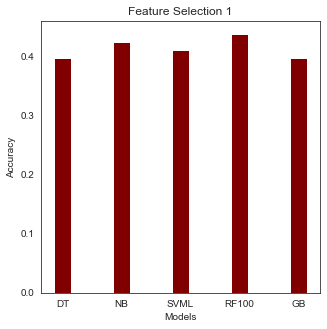

In [222]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'SVML', 'RF100', 'GB']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Feature Selection 1")
plt.show()

In [223]:
df.pop("colour_group_name")
df.pop("section_name")
df.pop("index_group_name")
df.pop("garment_group_name")
df.pop("index_name")

0      Lingeries/Tights
1            Ladieswear
2               Divided
3            Ladieswear
4               Divided
             ...       
724          Ladieswear
725          Ladieswear
726            Menswear
727            Menswear
728            Menswear
Name: index_name, Length: 729, dtype: object

In [224]:
acc = []
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals
acc = []
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,23].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [226]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [227]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

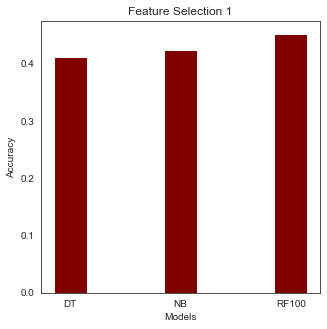

In [228]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'RF100']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Feature Selection 1")
plt.show()

In [229]:
acc

[0.410958904109589, 0.4246575342465753, 0.4520547945205479]

## Work done to the final medium set

In [230]:
df2 = pd.read_csv("medium_data.csv")

In [231]:
df2.pop("detail_desc")
df2.columns
df1 = df2.pop("article_id")
df2["article_id"] = df1
df = df2.head(100000)
processdf = pd.DataFrame()
for col in df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    le_vals = le.transform(df[col])
    processdf[col] = le_vals

In [232]:
X = processdf.iloc[:,:-1].values
y = processdf.iloc[:,33].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
acc = []

In [233]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

In [234]:
print("SciKitLearn")
print("Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print("Accuracy, Error")
print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))

SciKitLearn
Naive Bayes
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy, Error
0.286 0.714


In [235]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc.append(accuracy_score(y_test, y_pred))

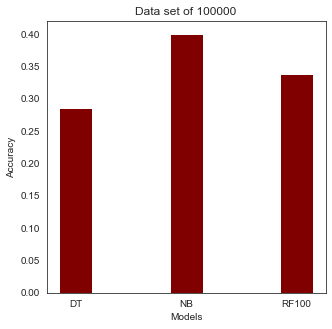

In [236]:
fig = plt.figure(figsize= (5, 5))
labs = ['DT', 'NB', 'RF100']
plt.bar(labs, acc, color ='maroon',
        width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Data set of 100000")
plt.show()

In [237]:
acc


[0.286, 0.4, 0.338]

## EntireSet testing against entire dataset for fun, not part of report

### 
ran out of memory, uncomment if you have the hardware, needs some memory opimization

In [238]:
#df = pd.read_csv("combined_data.csv")

In [239]:
#df.pop("detail_desc")
#df.columns
#df1 = df.pop("article_id")
#df["article_id"] = df1

In [240]:
#processdf = pd.DataFrame()
#for col in df.columns:
    #le = preprocessing.LabelEncoder()
    #le.fit(df[col])
    #le_vals = le.transform(df[col])
    #processdf[col] = le_vals

In [241]:
#processdf = pd.DataFrame()
#for col in df.columns:
    #le = preprocessing.LabelEncoder()
    #le.fit(df[col])
    #le_vals = le.transform(df[col])
    #processdf[col] = le_vals
#X = processdf.iloc[:,:-1].values
#y = processdf.iloc[:,33].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [242]:
#model = GaussianNB()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("SciKitLearn")
#print("Naive Bayes")
#print(confusion_matrix(y_test, y_pred))
#print("Accuracy, Error")
#print(accuracy_score(y_test, y_pred), 1 - accuracy_score(y_test, y_pred))